In [4]:
import pandas as pd
from pathlib import Path

def merge_calendar_with_listings(calendar_path, listings_path, output_filename=None, listing_id_column=None):
    """
    Merge calendar data with listings data, keeping only listings that are present in listings.csv.
    
    Parameters:
    calendar_path (str): Path to the merged calendar CSV file
    listings_path (str): Path to the listings.csv file
    output_filename (str, optional): Name for the output CSV file
    listing_id_column (str, optional): Column name in listings.csv that contains listing IDs
    
    Returns:
    pd.DataFrame: Filtered calendar data containing only listings from listings.csv
    """
    # Set default output filename if not provided
    if output_filename is None:
        output_filename = "filtered_calendar.csv"
    
    # Load calendar and listings data
    print(f"Loading calendar data from {calendar_path}...")
    calendar_df = pd.read_csv(calendar_path)
    print(f"Loaded {len(calendar_df):,} calendar entries")
    
    print(f"Loading listings data from {listings_path}...")
    listings_df = pd.read_csv(listings_path)
    print(f"Loaded {len(listings_df):,} listings")
    
    # Display available columns in listings.csv to help identify the ID column
    print("\nColumns in listings.csv:")
    for i, col in enumerate(listings_df.columns):
        print(f"  {i}: {col}")
    
    # Try to automatically identify the listing ID column if not provided
    if listing_id_column is None:
        # Look for common listing ID column names
        possible_id_columns = ['id', 'listing_id', 'ID', 'LISTING_ID']
        for col in possible_id_columns:
            if col in listings_df.columns:
                listing_id_column = col
                print(f"\nAutomatically selected '{listing_id_column}' as the listing ID column")
                break
        
        # If still not found, ask the user to provide the column name or index
        if listing_id_column is None:
            print("\nCould not automatically identify the listing ID column.")
            print("Please run the function again with the listing_id_column parameter set to the correct column name.")
            return None
    
    # Get the list of valid listing IDs from listings.csv
    valid_listing_ids = listings_df[listing_id_column].unique()
    print(f"Found {len(valid_listing_ids):,} unique listing IDs in listings.csv")
    
    # Count listings in calendar before filtering
    calendar_listing_count = calendar_df['listing_id'].nunique()
    print(f"Calendar contains {calendar_listing_count:,} unique listings before filtering")
    
    # Filter calendar to keep only valid listings
    print("Filtering calendar to keep only listings present in listings.csv...")
    filtered_calendar = calendar_df[calendar_df['listing_id'].isin(valid_listing_ids)]
    
    # Count entries and listings after filtering
    removed_entries = len(calendar_df) - len(filtered_calendar)
    removed_listings = calendar_listing_count - filtered_calendar['listing_id'].nunique()
    
    print(f"Removed {removed_entries:,} calendar entries ({removed_entries/len(calendar_df)*100:.2f}%)")
    print(f"Removed {removed_listings:,} listings ({removed_listings/calendar_listing_count*100:.2f}%)")
    print(f"Retained {filtered_calendar['listing_id'].nunique():,} listings")
    
    # Save filtered calendar to CSV
    print(f"Saving filtered calendar to {output_filename}...")
    filtered_calendar.to_csv(output_filename, index=False)
    
    # Print summary of the filtered data
    print("\nFiltered Calendar Summary:")
    print(f"Total rows: {len(filtered_calendar):,}")
    print(f"Unique listings: {filtered_calendar['listing_id'].nunique():,}")
    
    if 'date' in filtered_calendar.columns:
        # Convert date to datetime if it's not already
        if not pd.api.types.is_datetime64_any_dtype(filtered_calendar['date']):
            filtered_calendar['date'] = pd.to_datetime(filtered_calendar['date'])
        print(f"Date range: {filtered_calendar['date'].min()} to {filtered_calendar['date'].max()}")
    
    return filtered_calendar

# Example usage:
calendar_path = "paris_merged_calendar_mean.csv"
listings_path = "C:/Users/mvk/Documents/DATA_school/thesis/cleaned_listings_final.csv"
filtered_calendar = merge_calendar_with_listings(calendar_path, listings_path)

Loading calendar data from paris_merged_calendar_mean.csv...
Loaded 79,418,789 calendar entries
Loading listings data from C:/Users/mvk/Documents/DATA_school/thesis/cleaned_listings_final.csv...
Loaded 80,176 listings

Columns in listings.csv:
  0: listing_id
  1: neighbourhood_cleansed
  2: latitude
  3: longitude
  4: accommodates
  5: bedrooms
  6: has_kitchen
  7: has_wifi
  8: has_smoke_alarm
  9: has_essentials
  10: has_hot_water
  11: has_hair_dryer
  12: has_washer
  13: has_iron
  14: has_dishes_and_silverware
  15: has_bed_linens
  16: has_hangers
  17: has_cooking_basics
  18: has_refrigerator
  19: has_heating
  20: has_tv
  21: has_microwave
  22: has_shampoo
  23: has_hot_water_kettle
  24: has_dedicated_workspace
  25: has_cleaning_products
  26: bathrooms
  27: neighbourhood_cleansed_encoded

Automatically selected 'listing_id' as the listing ID column
Found 80,176 unique listing IDs in listings.csv
Calendar contains 128,063 unique listings before filtering
Filtering c

C:\Users\mvk\AppData\Local\Temp\ipykernel_22896\2131112295.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_calendar['date'] = pd.to_datetime(filtered_calendar['date'])


Date range: 2023-06-07 00:00:00 to 2025-09-12 00:00:00


In [6]:
import pandas as pd
from pathlib import Path

def merge_calendar_with_listings_data(calendar_path, listings_path, output_filename=None, listing_id_column="listing_id"):
    """
    Merge filtered calendar data with listings data on listing_id.
    
    Parameters:
    calendar_path (str): Path to the filtered calendar CSV file
    listings_path (str): Path to the listings.csv file
    output_filename (str, optional): Name for the output CSV file
    listing_id_column (str): Column name in listings.csv that contains listing IDs
    
    Returns:
    pd.DataFrame: Merged dataset combining calendar and listings information
    """
    # Set default output filename if not provided
    if output_filename is None:
        output_filename = "merged_calendar_listings.csv"
    
    # Load calendar and listings data
    print(f"Loading calendar data from {calendar_path}...")
    calendar_df = pd.read_csv(calendar_path)
    print(f"Loaded {len(calendar_df):,} calendar entries with {calendar_df['listing_id'].nunique():,} unique listings")
    
    print(f"Loading listings data from {listings_path}...")
    listings_df = pd.read_csv(listings_path)
    print(f"Loaded {len(listings_df):,} listings")
    
    # Ensure listing_id column in listings_df is named consistently with calendar_df
    if listing_id_column != "listing_id":
        listings_df = listings_df.rename(columns={listing_id_column: "listing_id"})
        print(f"Renamed '{listing_id_column}' to 'listing_id' in listings DataFrame for consistency")
    
    # Check data types to ensure merge works correctly
    if calendar_df['listing_id'].dtype != listings_df['listing_id'].dtype:
        print(f"Converting listing_id data types for consistency: calendar={calendar_df['listing_id'].dtype}, listings={listings_df['listing_id'].dtype}")
        # Convert both to int if possible, otherwise to string
        try:
            calendar_df['listing_id'] = calendar_df['listing_id'].astype(int)
            listings_df['listing_id'] = listings_df['listing_id'].astype(int)
            print("Converted listing_id columns to integer type")
        except ValueError:
            calendar_df['listing_id'] = calendar_df['listing_id'].astype(str)
            listings_df['listing_id'] = listings_df['listing_id'].astype(str)
            print("Converted listing_id columns to string type")
    
    # Confirm overlap between the two datasets
    calendar_listings = set(calendar_df['listing_id'].unique())
    master_listings = set(listings_df['listing_id'].unique())
    overlap = calendar_listings.intersection(master_listings)
    
    print(f"\nOverlap analysis:")
    print(f"Calendar has {len(calendar_listings):,} unique listings")
    print(f"Listings file has {len(master_listings):,} unique listings")
    print(f"Overlap: {len(overlap):,} listings ({len(overlap)/len(calendar_listings)*100:.2f}% of calendar listings)")
    
    # Perform the merge
    print("\nMerging calendar with listings data...")
    merged_df = pd.merge(
        calendar_df,
        listings_df,
        on='listing_id',
        how='left'  # Keep all calendar entries, even if listing details are missing
    )
    
    # Check for missing listing details after merge
    missing_details = merged_df.isna().any(axis=1).sum()
    if missing_details > 0:
        print(f"Warning: {missing_details:,} calendar entries ({missing_details/len(merged_df)*100:.2f}%) have missing listing details")
    
    # Save to CSV
    print(f"Saving merged data to {output_filename}...")
    merged_df.to_csv(output_filename, index=False)
    
    # Print information about the merged dataset
    print("\nMerged Dataset Summary:")
    print(f"Total rows: {len(merged_df):,}")
    print(f"Unique listings: {merged_df['listing_id'].nunique():,}")
    print(f"Total columns: {len(merged_df.columns):,}")
    
    # Print a sample of column names to verify merge worked correctly
    print("\nSample of columns in merged dataset:")
    sample_columns = list(merged_df.columns)[:10]  # First 10 columns
    for i, col in enumerate(sample_columns):
        print(f"  {i}: {col}")
    
    if len(merged_df.columns) > 10:
        print(f"  ... and {len(merged_df.columns) - 10} more columns")
    
    return merged_df

# Example usage:
calendar_path = "filtered_calendar.csv"
listings_path = "C:/Users/mvk/Documents/DATA_school/thesis/cleaned_listings_final.csv"
merged_data = merge_calendar_with_listings_data(calendar_path, listings_path, listing_id_column="listing_id")

Loading calendar data from filtered_calendar.csv...
Loaded 52,963,531 calendar entries with 80,176 unique listings
Loading listings data from C:/Users/mvk/Documents/DATA_school/thesis/cleaned_listings_final.csv...
Loaded 80,176 listings

Overlap analysis:
Calendar has 80,176 unique listings
Listings file has 80,176 unique listings
Overlap: 80,176 listings (100.00% of calendar listings)

Merging calendar with listings data...
Saving merged data to merged_calendar_listings.csv...

Merged Dataset Summary:
Total rows: 52,963,531
Unique listings: 80,176
Total columns: 31

Sample of columns in merged dataset:
  0: listing_id
  1: date
  2: price
  3: available
  4: neighbourhood_cleansed
  5: latitude
  6: longitude
  7: accommodates
  8: bedrooms
  9: has_kitchen
  ... and 21 more columns


**Polars**

In [6]:
import polars as pl
import numpy as np
from datetime import datetime, timedelta

# Define the path
path = "merged_calendar_listings.csv"

# First, get a list of unique listing IDs
print("Getting unique listing IDs...")
listing_ids = pl.scan_csv(path).select("listing_id").unique().collect()
unique_ids = listing_ids["listing_id"].to_list()

# Process data in chunks of listings
chunk_size = 10000  # Adjust based on your memory constraints
output_chunks = []

for i in range(0, len(unique_ids), chunk_size):
    print(f"Processing chunk {i//chunk_size + 1}/{(len(unique_ids) + chunk_size - 1)//chunk_size}...")
    chunk_ids = unique_ids[i:i+chunk_size]
    
    # Read only the data for these listings
    chunk_df = pl.scan_csv(path).filter(pl.col("listing_id").is_in(chunk_ids)).collect()
    
    # Handle outliers for this chunk
    threshold = chunk_df.select(pl.col("price").quantile(0.99)).item()
    outlier_listings = chunk_df.filter(pl.col("price") > threshold).select("listing_id").unique()
    
    chunk_df = chunk_df.filter(~pl.col("listing_id").is_in(outlier_listings.select("listing_id")))
    
    # Transform and create features
    transformed_df = (
        chunk_df
        .with_columns(pl.col("date").str.to_datetime())
        .with_columns(
            pl.col("price").fill_null(strategy="forward").over("listing_id")
        )
        .with_columns([
            pl.col("date").dt.weekday().alias("DTF_day_of_week"),
            pl.col("date").dt.month().alias("DTF_month"),
            (pl.col("date").dt.weekday() >= 5).cast(pl.Int8).alias("DTF_is_weekend"),
            pl.col("date").dt.ordinal_day().map_elements(
                lambda x: np.sin(2 * np.pi * x / 365.25),
                return_dtype=pl.Float64
            ).alias("DTF_season_sin"),
            pl.col("date").dt.ordinal_day().map_elements(
                lambda x: np.cos(2 * np.pi * x / 365.25),
                return_dtype=pl.Float64
            ).alias("DTF_season_cos")
        ])
    )
    
    # Process each listing separately to avoid the duplication issue
    all_processed_dfs = []
    
    for listing_id in chunk_df["listing_id"].unique():
        listing_df = transformed_df.filter(pl.col("listing_id") == listing_id).sort("date")
        
        # Create lag and rolling features
        processed_df = listing_df.with_columns([
            # Add lag features
            pl.col("price").shift(1).alias("price_lag_1d"),
            pl.col("price").shift(7).alias("price_lag_7d"),
            pl.col("price").shift(30).alias("price_lag_30d"),
            
            # Add rolling windows
            pl.col("price").shift(1).rolling_mean(
                window_size=7, 
                min_samples=1,
                center=False
            ).alias("rolling_mean_7d"),
            
            pl.col("price").shift(1).rolling_max(
                window_size=7, 
                min_samples=1,
                center=False
            ).alias("rolling_max_7d"),
            
            pl.col("price").shift(1).rolling_min(
                window_size=7, 
                min_samples=1,
                center=False
            ).alias("rolling_min_7d"),
            
            pl.col("price").shift(1).rolling_mean(
                window_size=14, 
                min_samples=1,
                center=False
            ).alias("rolling_mean_14d"),
            
            pl.col("price").shift(1).rolling_max(
                window_size=14, 
                min_samples=1,
                center=False
            ).alias("rolling_max_14d"),
            
            pl.col("price").shift(1).rolling_min(
                window_size=14, 
                min_samples=1,
                center=False
            ).alias("rolling_min_14d"),
            
            pl.col("price").shift(1).rolling_mean(
                window_size=30, 
                min_samples=1,
                center=False
            ).alias("rolling_mean_30d"),
            
            pl.col("price").shift(1).rolling_max(
                window_size=30, 
                min_samples=1,
                center=False
            ).alias("rolling_max_30d"),
            
            pl.col("price").shift(1).rolling_min(
                window_size=30, 
                min_samples=1,
                center=False
            ).alias("rolling_min_30d")
        ])
        
        # Drop null values (rows with insufficient history)
        processed_df = processed_df.drop_nulls()
        
        # Add to the list of processed DataFrames
        all_processed_dfs.append(processed_df)
    
    # Combine all processed listings
    if all_processed_dfs:
        temporal_df = pl.concat(all_processed_dfs)
        
        # Write each chunk to a Parquet file
        chunk_file = f"temporal_features_chunk_{i//chunk_size + 1}.parquet"
        temporal_df.write_parquet(chunk_file)
        print(f"Saved {chunk_file}")
        
        # Optionally append to a list of filenames for later concatenation
        output_chunks.append(chunk_file)

# Optionally, combine all chunks into one file
if output_chunks:
    print("Combining all chunks...")
    combined_df = pl.concat([pl.read_parquet(file) for file in output_chunks])
    
    # Save to CSV - should work now since we've avoided nested structures
    combined_df.write_csv("temporal_features_combined.csv")
    print("Process complete!")

Getting unique listing IDs...
Processing chunk 1/9...
Saved temporal_features_chunk_1.parquet
Processing chunk 2/9...
Saved temporal_features_chunk_2.parquet
Processing chunk 3/9...
Saved temporal_features_chunk_3.parquet
Processing chunk 4/9...
Saved temporal_features_chunk_4.parquet
Processing chunk 5/9...
Saved temporal_features_chunk_5.parquet
Processing chunk 6/9...
Saved temporal_features_chunk_6.parquet
Processing chunk 7/9...
Saved temporal_features_chunk_7.parquet
Processing chunk 8/9...
Saved temporal_features_chunk_8.parquet
Processing chunk 9/9...
Saved temporal_features_chunk_9.parquet
Combining all chunks...
Process complete!


**Subsets**

MOST PRICE CHANGES

In [1]:
import polars as pl
import os

# File path
input_file = "temporal_features_combined.csv"
output_file = "top_price_changers_subset.csv"

# Step 1: Count unique prices per listing using streaming approach
print("Calculating price changes for each listing...")

# First, let's get the schema to optimize reading
schema = pl.scan_csv(input_file).schema

# Get listing IDs and count price changes
# Use lazy evaluation and process in batches
price_changes_query = (
    pl.scan_csv(input_file, schema=schema)
    .group_by("listing_id")
    .agg(
        price_change_count=pl.col("price").n_unique()
    )
    .sort("price_change_count", descending=True)
)

# Execute the query
price_changes = price_changes_query.collect()

# Get top 10% of listings
top_10_percent = int(len(price_changes) * 0.1)
most_price_changes = price_changes.head(top_10_percent)
most_price_changes_ids = most_price_changes["listing_id"].to_list()

print(f"Identified {len(most_price_changes_ids)} listings with the most price changes")

# Step 2: Process the original file in chunks and filter for top changers
print("Creating subset with top price changing listings...")

# Create a lazy query that filters for the top listings
filtered_query = (
    pl.scan_csv(input_file, schema=schema)
    .filter(pl.col("listing_id").is_in(most_price_changes_ids))
)

# Execute and write directly to file
filtered_query.sink_csv(output_file, batch_size=10000)

# Get some stats about the result (needs a separate scan)
result_stats = (
    pl.scan_csv(output_file)
    .select([
        pl.len().alias("total_records"),
        pl.col("listing_id").n_unique().alias("total_listings")
    ])
).collect()

# Print summary
print(f"Subset created successfully!")
print(f"Subset dataset: {result_stats[0, 'total_listings']} listings, {result_stats[0, 'total_records']} records")
print(f"Saved to: {os.path.abspath(output_file)}")

# Optionally: Display some statistics about the price changes
print("\nPrice change statistics:")
change_stats = most_price_changes.describe()
print(change_stats)

Calculating price changes for each listing...


C:\Users\mvk\AppData\Local\Temp\ipykernel_19600\454062968.py:12: PerformanceWarning: Resolving the schema of a LazyFrame is a potentially expensive operation. Use `LazyFrame.collect_schema()` to get the schema without this warning.
  schema = pl.scan_csv(input_file).schema


Identified 7864 listings with the most price changes
Creating subset with top price changing listings...


C:\Users\mvk\AppData\Local\Temp\ipykernel_19600\454062968.py:45: DeprecationWarning: The old streaming engine is being deprecated and will soon be replaced by the new streaming engine. Starting Polars version 1.23.0 and until the new streaming engine is released, the old streaming engine may become less usable. For people who rely on the old streaming engine, it is suggested to pin your version to before 1.23.0.

More information on the new streaming engine: https://github.com/pola-rs/polars/issues/20947
  filtered_query.sink_csv(output_file, batch_size=10000)


Subset created successfully!
Subset dataset: 7864 listings, 6192516 records
Saved to: c:\Users\mvk\Documents\GitHub\Airbnb-spatiotemporal\etc\top_price_changers_subset.csv

Price change statistics:
shape: (9, 3)
┌────────────┬─────────────┬────────────────────┐
│ statistic  ┆ listing_id  ┆ price_change_count │
│ ---        ┆ ---         ┆ ---                │
│ str        ┆ f64         ┆ f64                │
╞════════════╪═════════════╪════════════════════╡
│ count      ┆ 7864.0      ┆ 7864.0             │
│ null_count ┆ 0.0         ┆ 0.0                │
│ mean       ┆ 3.1071e17   ┆ 70.341556          │
│ std        ┆ 3.8806e17   ┆ 69.468589          │
│ min        ┆ 5396.0      ┆ 20.0               │
│ 25%        ┆ 2.6732514e7 ┆ 26.0               │
│ 50%        ┆ 4.5826642e7 ┆ 41.0               │
│ 75%        ┆ 7.3905e17   ┆ 81.0               │
│ max        ┆ 9.7307e17   ┆ 392.0              │
└────────────┴─────────────┴────────────────────┘


MOST EXPENSIVE

In [3]:
import polars as pl
import os

# File path
input_file = "temporal_features_combined.csv"
output_file = "top_expensive_listings_subset.csv"

# Step 1: Calculate average price per listing using streaming approach
print("Calculating average price for each listing...")

# First, let's get the schema to optimize reading
schema = pl.scan_csv(input_file).schema

# Get listing IDs and calculate average price
# Use lazy evaluation and process in batches
avg_price_query = (
    pl.scan_csv(input_file, schema=schema)
    .group_by("listing_id")
    .agg(
        avg_price=pl.col("price").mean()
    )
    .sort("avg_price", descending=True)
)

# Execute the query
avg_prices = avg_price_query.collect()

# Get top 10% of listings by average price
top_10_percent = int(len(avg_prices) * 0.1)
most_expensive = avg_prices.head(top_10_percent)
most_expensive_ids = most_expensive["listing_id"].to_list()

print(f"Identified {len(most_expensive_ids)} most expensive listings")

# Step 2: Process the original file in chunks and filter for expensive listings
print("Creating subset with top expensive listings...")

# Create a lazy query that filters for the top listings
filtered_query = (
    pl.scan_csv(input_file, schema=schema)
    .filter(pl.col("listing_id").is_in(most_expensive_ids))
)

# Execute and write directly to file
filtered_query.sink_csv(output_file, batch_size=10000)

# Get some stats about the result (needs a separate scan)
result_stats = (
    pl.scan_csv(output_file)
    .select([
        pl.len().alias("total_records"),
        pl.col("listing_id").n_unique().alias("total_listings")
    ])
).collect()

# Print summary
print(f"Subset created successfully!")
print(f"Subset dataset: {result_stats[0, 'total_listings']} listings, {result_stats[0, 'total_records']} records")
print(f"Saved to: {os.path.abspath(output_file)}")

# Optionally: Display some statistics about the price distribution
print("\nPrice statistics for most expensive listings:")
price_stats = most_expensive.describe()
print(price_stats)

Calculating average price for each listing...


C:\Users\mvk\AppData\Local\Temp\ipykernel_19600\1043251937.py:12: PerformanceWarning: Resolving the schema of a LazyFrame is a potentially expensive operation. Use `LazyFrame.collect_schema()` to get the schema without this warning.
  schema = pl.scan_csv(input_file).schema


Identified 7864 most expensive listings
Creating subset with top expensive listings...


C:\Users\mvk\AppData\Local\Temp\ipykernel_19600\1043251937.py:45: DeprecationWarning: The old streaming engine is being deprecated and will soon be replaced by the new streaming engine. Starting Polars version 1.23.0 and until the new streaming engine is released, the old streaming engine may become less usable. For people who rely on the old streaming engine, it is suggested to pin your version to before 1.23.0.

More information on the new streaming engine: https://github.com/pola-rs/polars/issues/20947
  filtered_query.sink_csv(output_file, batch_size=10000)


Subset created successfully!
Subset dataset: 7864 listings, 4447224 records
Saved to: c:\Users\mvk\Documents\GitHub\Airbnb-spatiotemporal\etc\top_expensive_listings_subset.csv

Price statistics for most expensive listings:
shape: (9, 3)
┌────────────┬────────────┬────────────┐
│ statistic  ┆ listing_id ┆ avg_price  │
│ ---        ┆ ---        ┆ ---        │
│ str        ┆ f64        ┆ f64        │
╞════════════╪════════════╪════════════╡
│ count      ┆ 7864.0     ┆ 7864.0     │
│ null_count ┆ 0.0        ┆ 0.0        │
│ mean       ┆ 8.6684e17  ┆ 766.437892 │
│ std        ┆ 4.0085e17  ┆ 325.957588 │
│ min        ┆ 17994.0    ┆ 450.0      │
│ 25%        ┆ 8.4903e17  ┆ 515.638223 │
│ 50%        ┆ 1.0463e18  ┆ 650.0      │
│ 75%        ┆ 1.1188e18  ┆ 924.086777 │
│ max        ┆ 1.2386e18  ┆ 3400.0     │
└────────────┴────────────┴────────────┘


CHEAPEST

In [7]:
import polars as pl
import os

# File path
input_file = "temporal_features_combined.csv"
output_file = "top_cheapest_listings_subset.csv"

# Step 1: Calculate average price per listing using streaming approach
print("Calculating average price for each listing...")

# First, let's get the schema to optimize reading
schema = pl.scan_csv(input_file).schema

# Get listing IDs and calculate average price
# Use lazy evaluation and process in batches
avg_price_query = (
    pl.scan_csv(input_file, schema=schema)
    .group_by("listing_id")
    .agg(
        avg_price=pl.col("price").mean()
    )
    .sort("avg_price")  # Default is ascending, so this will sort from cheapest to most expensive
)

# Execute the query
avg_prices = avg_price_query.collect()

# Get bottom 10% of listings by average price (cheapest)
bottom_10_percent = int(len(avg_prices) * 0.1)
cheapest = avg_prices.head(bottom_10_percent)  # Since we sorted ascending, head gives the cheapest
cheapest_ids = cheapest["listing_id"].to_list()

print(f"Identified {len(cheapest_ids)} cheapest listings")

# Step 2: Process the original file in chunks and filter for cheapest listings
print("Creating subset with cheapest listings...")

# Create a lazy query that filters for the bottom listings
filtered_query = (
    pl.scan_csv(input_file, schema=schema)
    .filter(pl.col("listing_id").is_in(cheapest_ids))
)

# Execute and write directly to file
filtered_query.sink_csv(output_file, batch_size=10000)

# Get some stats about the result (needs a separate scan)
result_stats = (
    pl.scan_csv(output_file)
    .select([
        pl.len().alias("total_records"),
        pl.col("listing_id").n_unique().alias("total_listings")
    ])
).collect()

# Print summary
print(f"Subset created successfully!")
print(f"Subset dataset: {result_stats[0, 'total_listings']} listings, {result_stats[0, 'total_records']} records")
print(f"Saved to: {os.path.abspath(output_file)}")

# Optionally: Display some statistics about the price distribution
print("\nPrice statistics for cheapest listings:")
price_stats = cheapest.describe()
print(price_stats)

Calculating average price for each listing...


C:\Users\mvk\AppData\Local\Temp\ipykernel_19600\574488735.py:12: PerformanceWarning: Resolving the schema of a LazyFrame is a potentially expensive operation. Use `LazyFrame.collect_schema()` to get the schema without this warning.
  schema = pl.scan_csv(input_file).schema


Identified 7864 cheapest listings
Creating subset with cheapest listings...


C:\Users\mvk\AppData\Local\Temp\ipykernel_19600\574488735.py:45: DeprecationWarning: The old streaming engine is being deprecated and will soon be replaced by the new streaming engine. Starting Polars version 1.23.0 and until the new streaming engine is released, the old streaming engine may become less usable. For people who rely on the old streaming engine, it is suggested to pin your version to before 1.23.0.

More information on the new streaming engine: https://github.com/pola-rs/polars/issues/20947
  filtered_query.sink_csv(output_file, batch_size=10000)


Subset created successfully!
Subset dataset: 7864 listings, 5681037 records
Saved to: c:\Users\mvk\Documents\GitHub\Airbnb-spatiotemporal\etc\top_cheapest_listings_subset.csv

Price statistics for cheapest listings:
shape: (9, 3)
┌────────────┬─────────────┬───────────┐
│ statistic  ┆ listing_id  ┆ avg_price │
│ ---        ┆ ---         ┆ ---       │
│ str        ┆ f64         ┆ f64       │
╞════════════╪═════════════╪═══════════╡
│ count      ┆ 7864.0      ┆ 7864.0    │
│ null_count ┆ 0.0         ┆ 0.0       │
│ mean       ┆ 2.4027e17   ┆ 55.359438 │
│ std        ┆ 4.3413e17   ┆ 10.731974 │
│ min        ┆ 11487.0     ┆ 0.0       │
│ 25%        ┆ 1.1935628e7 ┆ 49.0      │
│ 50%        ┆ 2.5969375e7 ┆ 57.145494 │
│ 75%        ┆ 5.3183033e7 ┆ 64.759891 │
│ max        ┆ 1.2391e18   ┆ 70.0      │
└────────────┴─────────────┴───────────┘


RICHEST AND POOREST neighboorhoud

In [10]:
import polars as pl
import os

# File path
temporal_features_file = "temporal_features_combined.csv"
richest_output_file = "richest_neighborhoods_subset.csv"
poorest_output_file = "poorest_neighborhoods_subset.csv"

# Define the richest and poorest neighborhoods
richest_neighborhoods = ['Louvre', 'Luxembourg', 'Palais-Bourbon']
poorest_neighborhoods = ['Gobelins', 'Buttes-Chaumont', 'Ménilmontant']

print("Processing neighborhood data...")

# Get schema to optimize reading
schema = pl.scan_csv(temporal_features_file).schema

# Process data for richest neighborhoods
print("Creating subset for richest neighborhoods...")
richest_query = (
    pl.scan_csv(temporal_features_file, schema=schema)
    .filter(pl.col("neighbourhood_cleansed").is_in(richest_neighborhoods))
)
richest_query.sink_csv(richest_output_file, batch_size=10000)

# Process data for poorest neighborhoods
print("Creating subset for poorest neighborhoods...")
poorest_query = (
    pl.scan_csv(temporal_features_file, schema=schema)
    .filter(pl.col("neighbourhood_cleansed").is_in(poorest_neighborhoods))
)
poorest_query.sink_csv(poorest_output_file, batch_size=10000)

# Get statistics for the output files
try:
    richest_stats = (
        pl.scan_csv(richest_output_file)
        .select([
            pl.len().alias("total_records"),
            pl.col("listing_id").n_unique().alias("total_listings")
        ])
    ).collect()
    
    poorest_stats = (
        pl.scan_csv(poorest_output_file)
        .select([
            pl.len().alias("total_records"),
            pl.col("listing_id").n_unique().alias("total_listings")
        ])
    ).collect()
    
    # Print summary
    print("\nRichest neighborhoods subset:")
    print(f"- Neighborhoods: {', '.join(richest_neighborhoods)}")
    print(f"- Listings: {richest_stats[0, 'total_listings']}")
    print(f"- Records: {richest_stats[0, 'total_records']}")
    print(f"- Saved to: {os.path.abspath(richest_output_file)}")

    print("\nPoorest neighborhoods subset:")
    print(f"- Neighborhoods: {', '.join(poorest_neighborhoods)}")
    print(f"- Listings: {poorest_stats[0, 'total_listings']}")
    print(f"- Records: {poorest_stats[0, 'total_records']}")
    print(f"- Saved to: {os.path.abspath(poorest_output_file)}")
    
except Exception as e:
    # Handle the case where files might be empty or have other issues
    print(f"Error getting statistics: {e}")
    
    # Check if files exist and have content
    for file, neighborhoods in [(richest_output_file, "richest"), (poorest_output_file, "poorest")]:
        if os.path.exists(file):
            size = os.path.getsize(file)
            print(f"{neighborhoods.capitalize()} neighborhoods file exists, size: {size/1024:.2f} KB")
        else:
            print(f"{neighborhoods.capitalize()} neighborhoods file was not created")

print("\nProcess complete!")

Processing neighborhood data...
Creating subset for richest neighborhoods...


C:\Users\mvk\AppData\Local\Temp\ipykernel_19600\144201306.py:16: PerformanceWarning: Resolving the schema of a LazyFrame is a potentially expensive operation. Use `LazyFrame.collect_schema()` to get the schema without this warning.
  schema = pl.scan_csv(temporal_features_file).schema
C:\Users\mvk\AppData\Local\Temp\ipykernel_19600\144201306.py:24: DeprecationWarning: The old streaming engine is being deprecated and will soon be replaced by the new streaming engine. Starting Polars version 1.23.0 and until the new streaming engine is released, the old streaming engine may become less usable. For people who rely on the old streaming engine, it is suggested to pin your version to before 1.23.0.

More information on the new streaming engine: https://github.com/pola-rs/polars/issues/20947
  richest_query.sink_csv(richest_output_file, batch_size=10000)


Creating subset for poorest neighborhoods...


C:\Users\mvk\AppData\Local\Temp\ipykernel_19600\144201306.py:32: DeprecationWarning: The old streaming engine is being deprecated and will soon be replaced by the new streaming engine. Starting Polars version 1.23.0 and until the new streaming engine is released, the old streaming engine may become less usable. For people who rely on the old streaming engine, it is suggested to pin your version to before 1.23.0.

More information on the new streaming engine: https://github.com/pola-rs/polars/issues/20947
  poorest_query.sink_csv(poorest_output_file, batch_size=10000)



Richest neighborhoods subset:
- Neighborhoods: Louvre, Luxembourg, Palais-Bourbon
- Listings: 6016
- Records: 3827218
- Saved to: c:\Users\mvk\Documents\GitHub\Airbnb-spatiotemporal\etc\richest_neighborhoods_subset.csv

Poorest neighborhoods subset:
- Neighborhoods: Gobelins, Buttes-Chaumont, Ménilmontant
- Listings: 11090
- Records: 7006978
- Saved to: c:\Users\mvk\Documents\GitHub\Airbnb-spatiotemporal\etc\poorest_neighborhoods_subset.csv

Process complete!


Loading data...
Selected 20 random listings for visualization


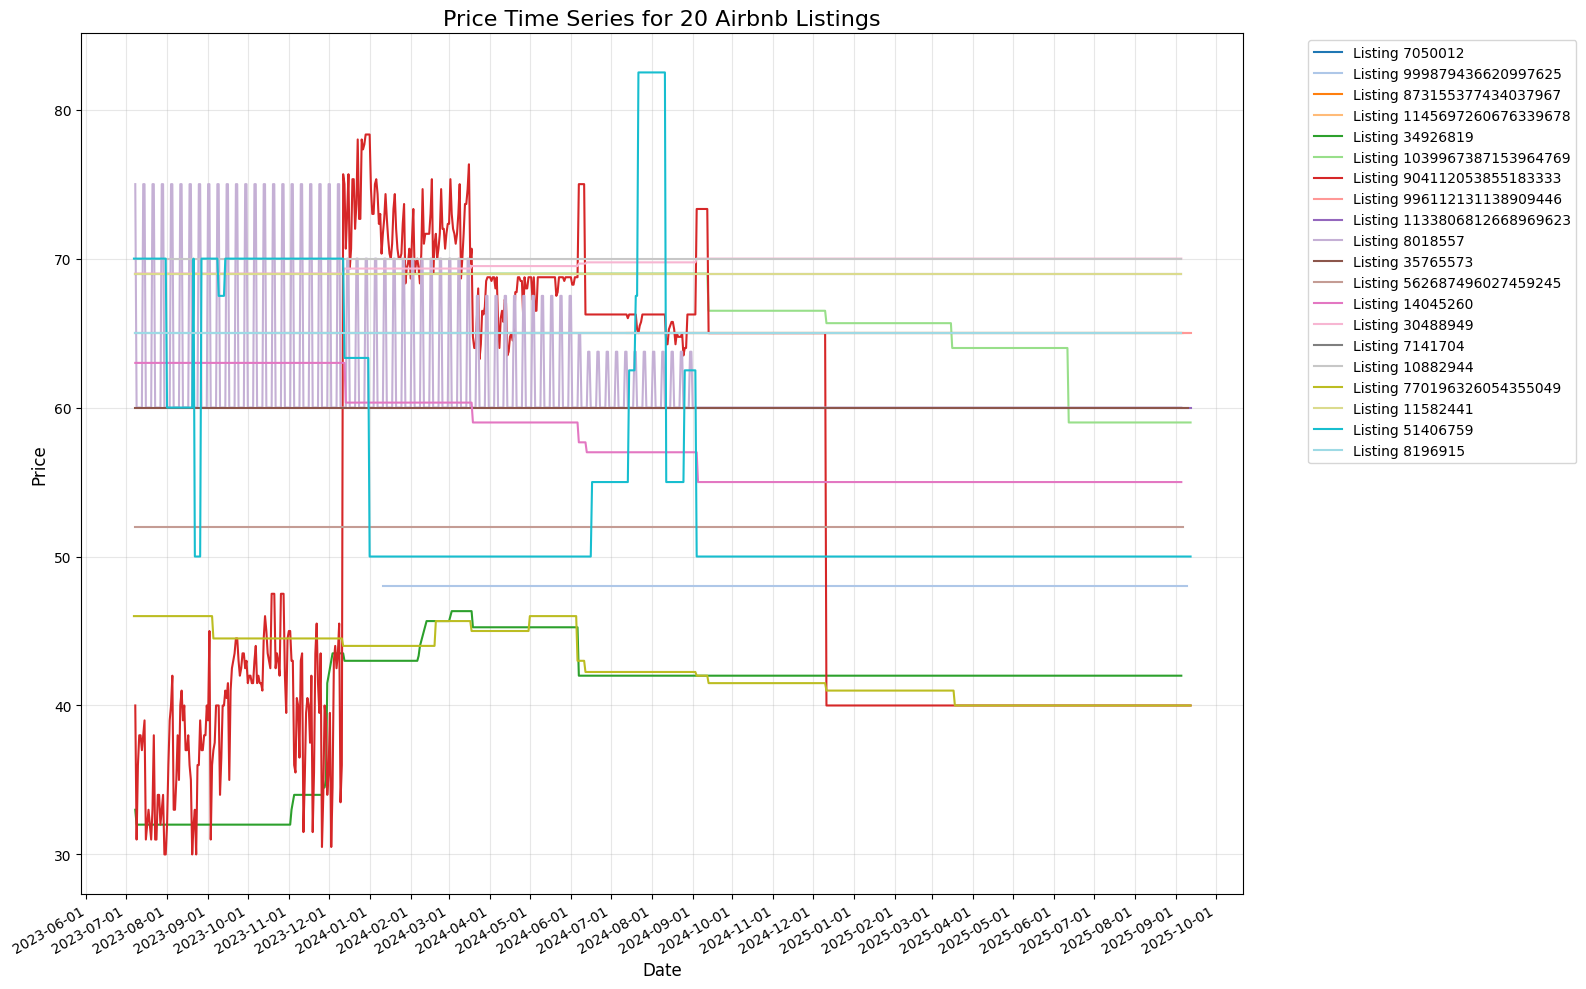

Visualization saved as 'listing_price_timeseries.png'


In [8]:
import polars as pl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from datetime import datetime
import random

# Load the temporal features data
print("Loading data...")
df = pl.read_csv("top_cheapest_listings_subset.csv")

# Convert date column to datetime
df = df.with_columns(pl.col("date").str.to_datetime())

# Select 20 random listings
unique_listings = df["listing_id"].unique().to_list()
sample_size = min(20, len(unique_listings))
selected_listings = random.sample(unique_listings, sample_size)

print(f"Selected {sample_size} random listings for visualization")

# Create the plot
plt.figure(figsize=(16, 10))
colors = plt.cm.tab20.colors  # Get 20 distinct colors

# Plot each listing
for i, listing_id in enumerate(selected_listings):
    # Filter data for this listing
    listing_data = df.filter(pl.col("listing_id") == listing_id)
    
    # Sort by date
    listing_data = listing_data.sort("date")
    
    # Get dates and prices as numpy arrays for plotting
    dates = listing_data["date"].to_numpy()
    prices = listing_data["price"].to_numpy()
    
    # Plot this listing with its own color
    plt.plot(dates, prices, color=colors[i % len(colors)], linewidth=1.5, 
             label=f"Listing {listing_id}")

# Format the plot
plt.title("Price Time Series for 20 Airbnb Listings", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.grid(True, alpha=0.3)

# Format date axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()  # Rotate date labels

# Add legend but place it outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.savefig("listing_price_timeseries.png", dpi=300)
plt.show()

print("Visualization saved as 'listing_price_timeseries.png'")